In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Time_series_analysis_and_forecast_DATASET.csv to Time_series_analysis_and_forecast_DATASET.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Time_series_analysis_and_forecast_DATASET.csv']))

In [4]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [5]:
df.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [6]:
df['FullDate'].dtype

dtype('O')

In [7]:
# Convert the 'FullDate' column to datetime type
df['FullDate'] = pd.to_datetime(df['FullDate'])

In [8]:
# Split 'FullDate' into separate columns for 'Date' and 'Time'
df['Date'] = df['FullDate'].dt.date
df['Time'] = df['FullDate'].dt.time

In [9]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
 5   Date       92016 non-null  object        
 6   Time       92016 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 4.9+ MB


In [11]:
df_corr = df.corr()

<ipython-input-11-673bd41f6603>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


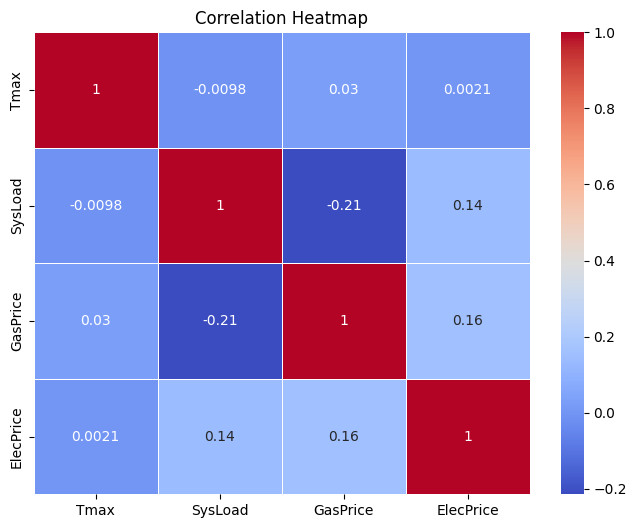

In [12]:
# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [13]:
df.shape

(92016, 7)

In [14]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice,Date,Time
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710,2010-09-01,00:00:00
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635,2010-09-01,01:00:00
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565,2010-09-01,02:00:00
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910,2010-09-01,03:00:00
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030,2010-09-01,04:00:00


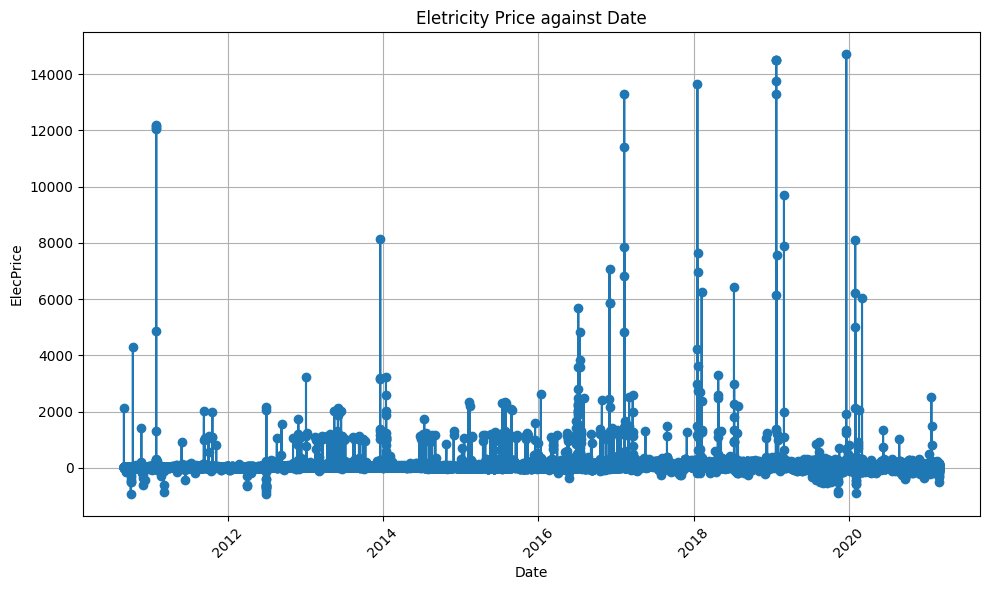

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['ElecPrice'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('ElecPrice')
plt.title('Eletricity Price against Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Electricity Price')

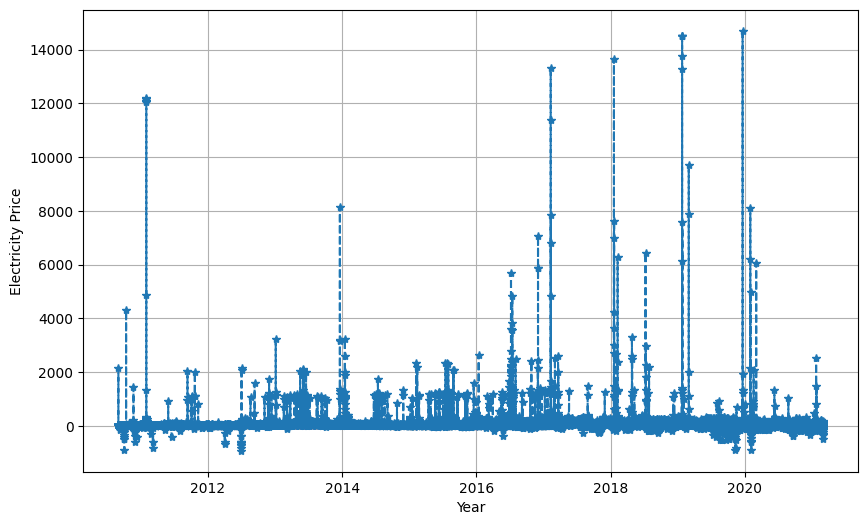

In [16]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df.Date, df.ElecPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Electricity Price' )


Text(0, 0.5, 'Gas Price')

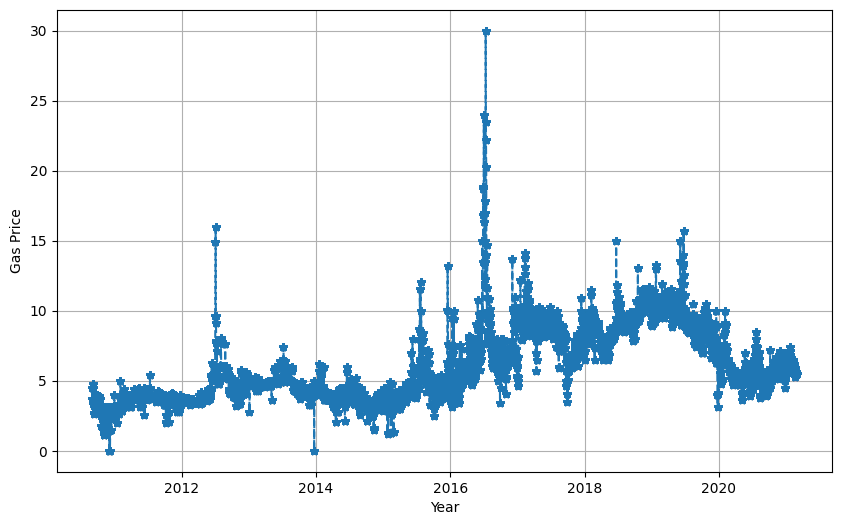

In [17]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df.Date, df.GasPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel('Year' )
plt.ylabel('Gas Price' )


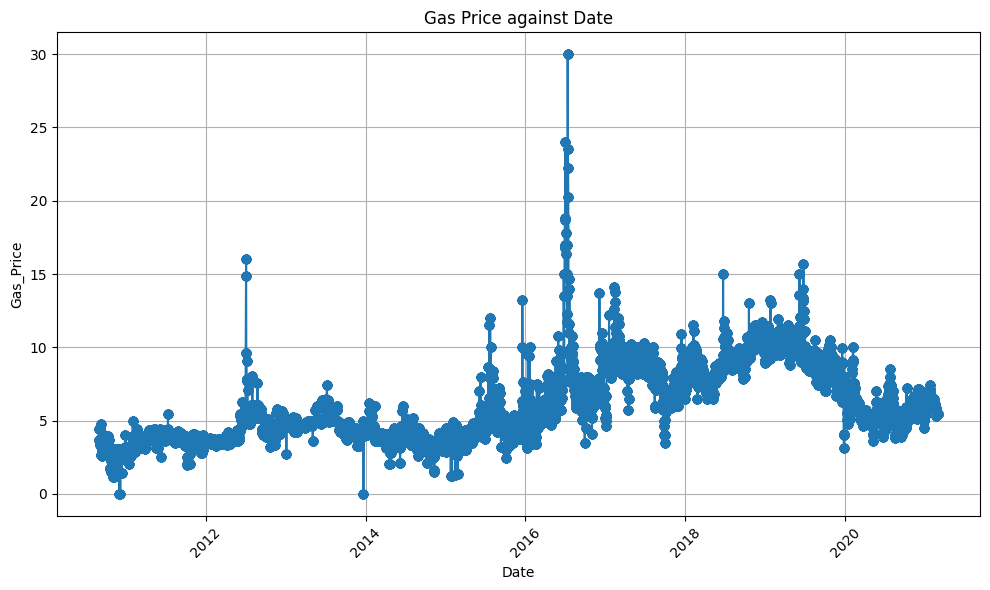

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['GasPrice'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Gas_Price')
plt.title('Gas Price against Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
df.ElecPrice.isna().sum()

0

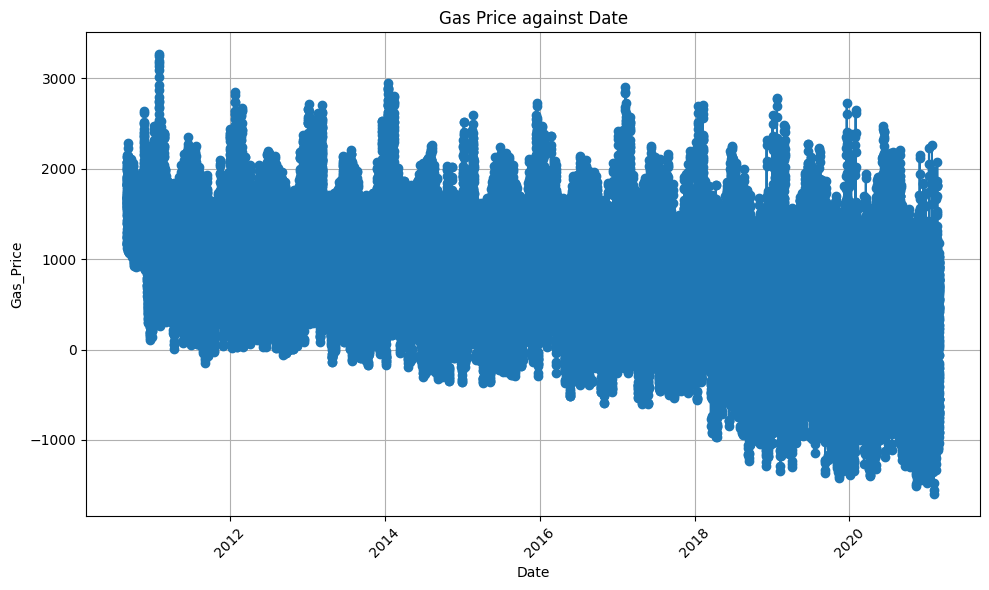

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['SysLoad'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Gas_Price')
plt.title('Gas Price against Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
df.shape

(92016, 7)

In [22]:
df.set_index('FullDate', inplace=True)

In [23]:
time_series = df.copy()

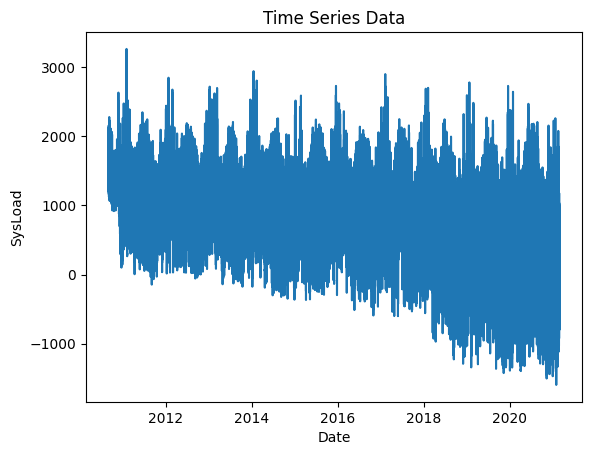

In [24]:
plt.figure()
plt.plot(df.index, df['SysLoad'])
plt.xlabel('Date')
plt.ylabel('SysLoad')
plt.title('Time Series Data')
plt.show()

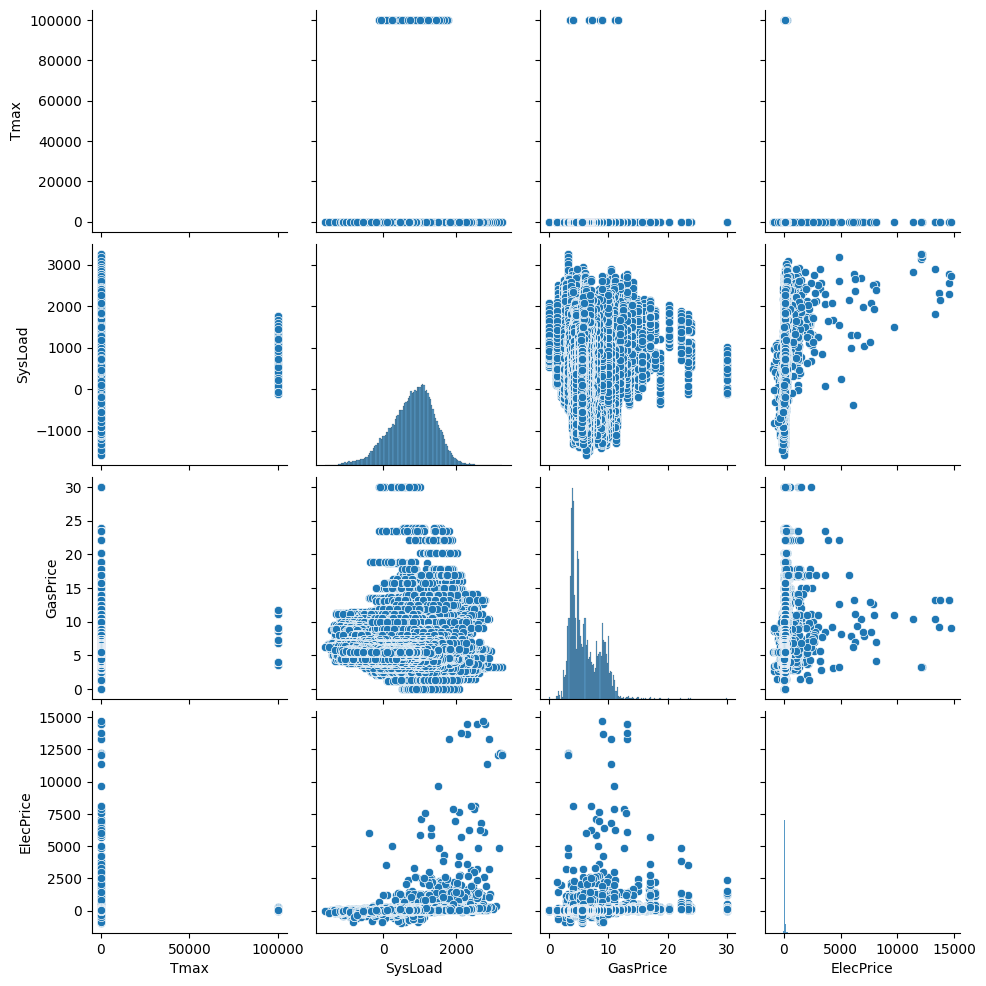

In [25]:
sns.pairplot(df)
plt.show()

In [26]:
sampled_ts = time_series.resample('M').mean()

<ipython-input-26-eeed38f106ae>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sampled_ts = time_series.resample('M').mean()


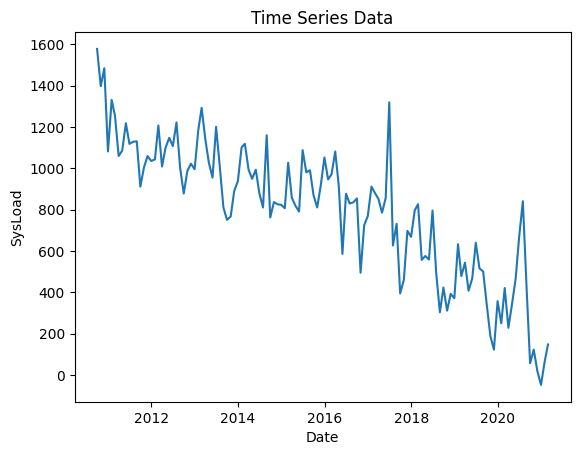

In [27]:
plt.figure()
plt.plot(sampled_ts.index, sampled_ts['SysLoad'])
plt.xlabel('Date')
plt.ylabel('SysLoad')
plt.title('Time Series Data')
plt.show()

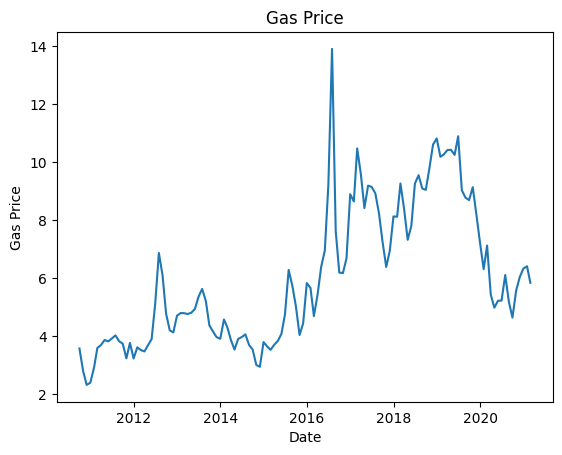

In [28]:
plt.figure()
plt.plot(sampled_ts.index, sampled_ts['GasPrice'])
plt.xlabel('Date')
plt.ylabel('Gas Price')
plt.title('Gas Price')
plt.show()

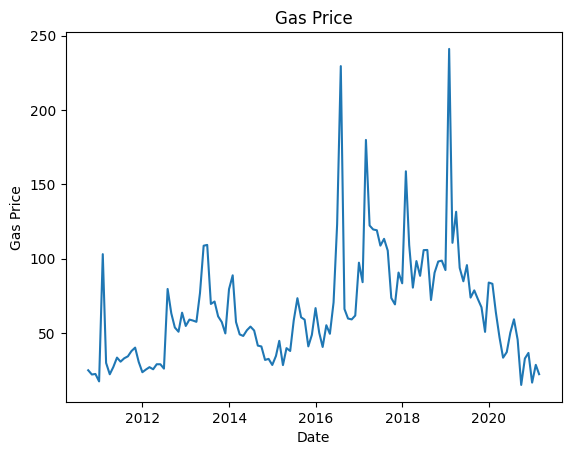

In [29]:
plt.figure()
plt.plot(sampled_ts.index, sampled_ts['ElecPrice'])
plt.xlabel('Date')
plt.ylabel('Gas Price')
plt.title('Gas Price')
plt.show()

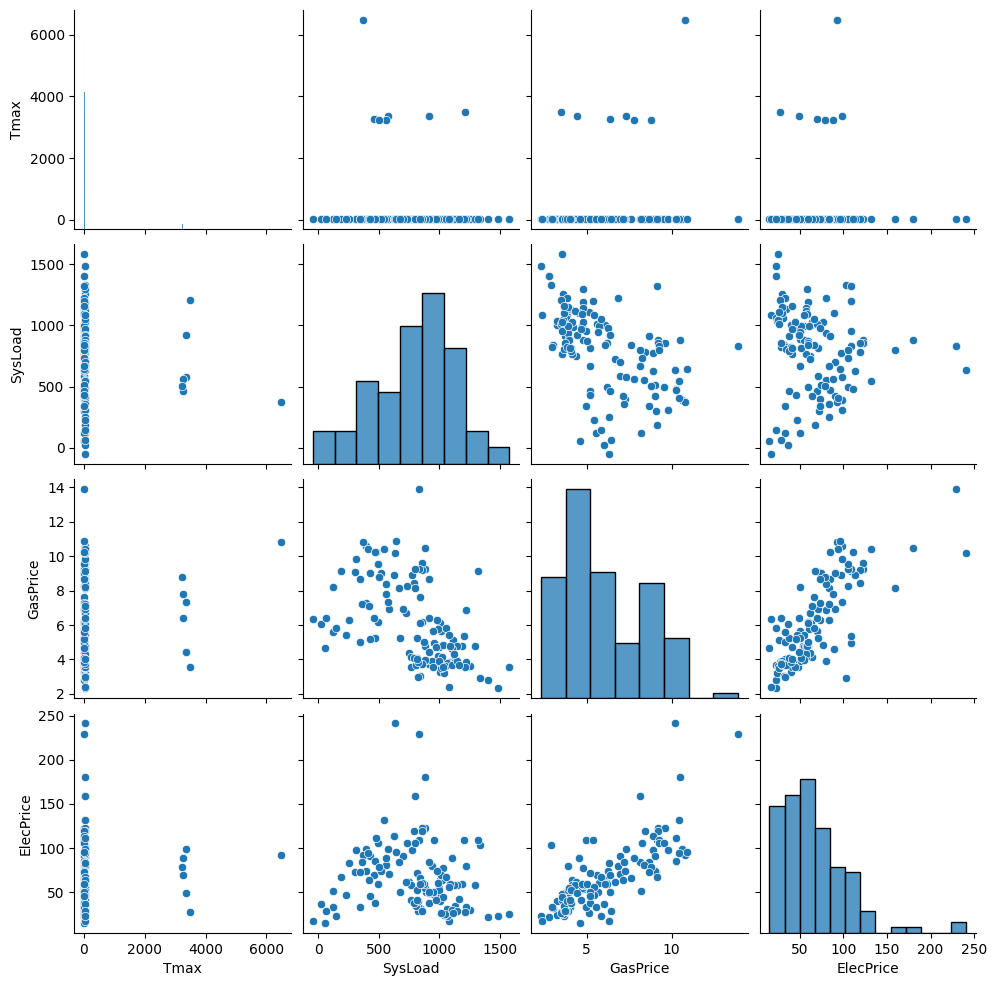

In [30]:
sns.pairplot(sampled_ts)
plt.show()

In [31]:
time_series.shape

(92016, 6)

In [32]:
sampled_ts.shape

(126, 4)

In [33]:
Q14_Q16 = time_series.copy()

In [34]:
Q14_Q16.head()

,Tmax,SysLoad,GasPrice,ElecPrice,Date,Time
FullDate,,,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710,2010-09-01,00:00:00
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635,2010-09-01,01:00:00
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565,2010-09-01,02:00:00
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910,2010-09-01,03:00:00
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030,2010-09-01,04:00:00


In [35]:
#pip install Prophet

In [39]:
from prophet import Prophet

In [40]:
# Resample the data to daily frequency and sum the values for each day
daily_data = Q14_Q16.resample('D').sum()

<ipython-input-40-78d874ad5824>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = Q14_Q16.resample('D').sum()


In [41]:
# Split the data into train and test sets
train_days = 2757
train_data = daily_data.iloc[:train_days]
test_data = daily_data.iloc[train_days:]

In [42]:
# Reset the index of train and test data to make 'FullDate' a column instead of the index
train_data.reset_index(inplace=True)
test_data.reset_index(inplace=True)

In [43]:
# Create the Prophet model and add the 'ElecPrice' column as the target variable 'y'
model = Prophet()
model.add_seasonality(name='daily', period=1, fourier_order=5)  # Add a daily seasonality with Fourier order 5

In [44]:
# Fit the model on the train_data
model.fit(train_data[['FullDate', 'ElecPrice']].rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}))

INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp84_c_67_/q_hemwkh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp84_c_67_/bicfad8j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75565', 'data', 'file=/tmp/tmp84_c_67_/q_hemwkh.json', 'init=/tmp/tmp84_c_67_/bicfad8j.json', 'output', 'file=/tmp/tmp84_c_67_/prophet_modelhm30aqce/prophet_model-20230802064033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:40:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:40:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [45]:
# Create a future DataFrame to make predictions for the test set
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)

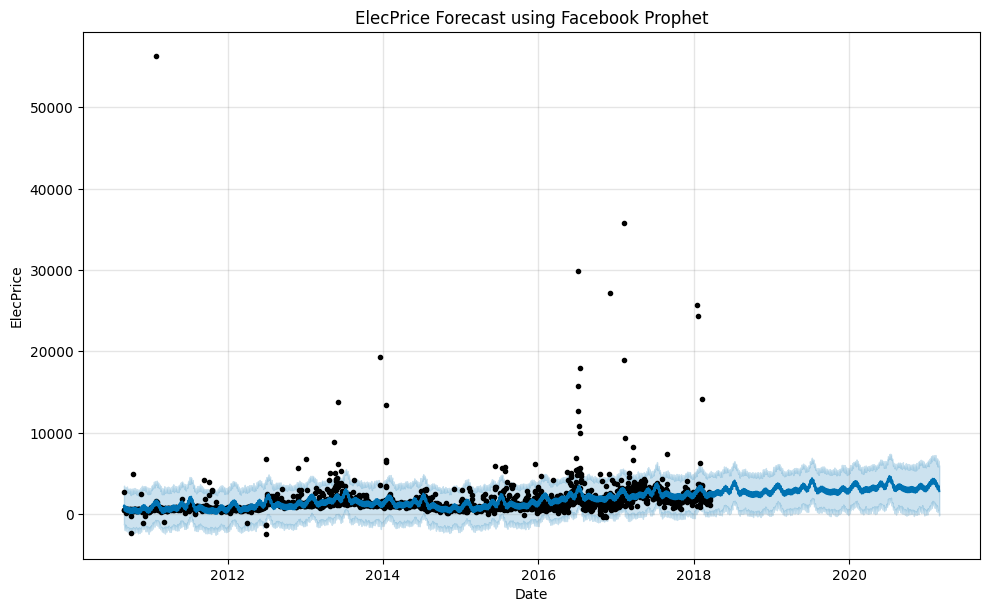

In [46]:
# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('ElecPrice')
plt.title('ElecPrice Forecast using Facebook Prophet')
plt.show()

In [47]:
# Access the forecasted values for the test set
test_forecast = forecast.iloc[train_days:]

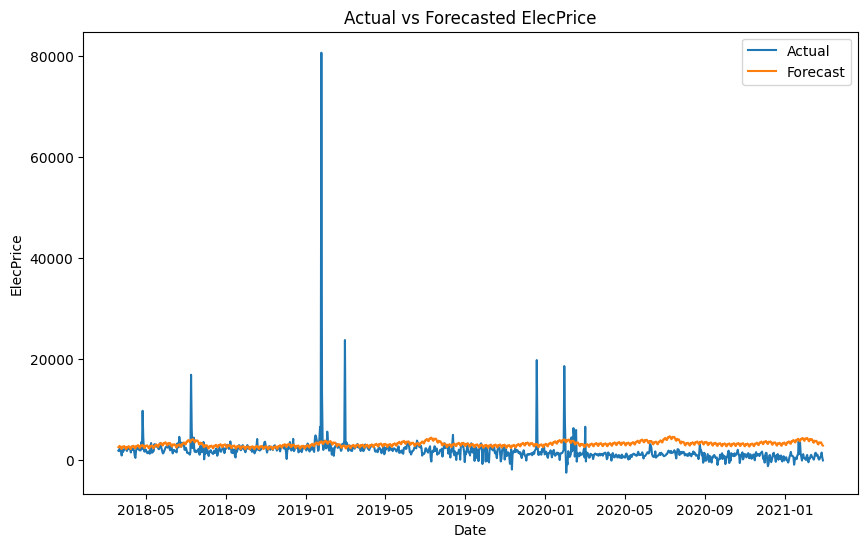

In [48]:
# Compare the forecasted values with the actual test data
plt.figure(figsize=(10, 6))
plt.plot(test_data['FullDate'], test_data['ElecPrice'], label='Actual')
plt.plot(test_forecast['ds'], test_forecast['yhat'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('ElecPrice')
plt.legend()
plt.title('Actual vs Forecasted ElecPrice')
plt.show()

In [49]:
Q17_Q19 = time_series.copy()

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [56]:
# Reset index to make 'FullDate' a regular column again
Q17_Q19.reset_index(inplace=True)

In [57]:
# Rename columns for Prophet compatibility
Q17_Q19.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y', 'SysLoad': 'add1', 'Tmax': 'add2', 'GasPrice': 'add3'}, inplace=True)

In [58]:
Q17_Q19.head()

,ds,add2,add1,add3,y,Date,Time
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710,2010-09-01,00:00:00
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635,2010-09-01,01:00:00
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565,2010-09-01,02:00:00
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910,2010-09-01,03:00:00
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030,2010-09-01,04:00:00


In [59]:
# Split Q17_Q19 into train and test sets
train = Q17_Q19[:-2757]
test = Q17_Q19[-2757:]

In [60]:
# Initialize and fit the Prophet model with regressors
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp84_c_67_/rvqs351d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp84_c_67_/3trhmfeq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30483', 'data', 'file=/tmp/tmp84_c_67_/rvqs351d.json', 'init=/tmp/tmp84_c_67_/3trhmfeq.json', 'output', 'file=/tmp/tmp84_c_67_/prophet_modelbvl60hic/prophet_model-20230802064751.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:47:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:48:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [62]:
# Make forecasts
future = model.make_future_dataframe(periods=2757)
future['add1'] = Q17_Q19['add1']
future['add2'] = Q17_Q19['add2']
future['add3'] = Q17_Q19['add3']
forecast = model.predict(future)

In [63]:
# Extract the forecasted values for the test period
forecast_test = forecast[-2757:]

In [64]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test['y'], forecast_test['yhat'])
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 36.239196632116034
